In [18]:
# Import libraries
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
# Adjust the configuration of plots
matplotlib.rcParams['figure.figsize'] = [7,4]

df = pd.read_csv(r'C:\Users\nasru\OneDrive\Desktop\Python-PRJ\RealState\RS-Cleaned.csv')

In [2]:
# Looking at the data. 
df.head()

,City,Price,Living_area,Volume,Room,Bedroom,Floor,Interior,Type,Year_built,Balcony,Garden,Storeroom,Parking,Garage
0,Amsterdam,8900,285,896,5,3,1,Upholstered or furnished,Apartment,2001-01-01,Present,Not present,Present,Yes,Yes
1,Amsterdam,5600,127,318,3,2,1,Upholstered,Apartment,1999-01-01,Present,Not present,Not present,Yes,Yes
2,Amsterdam,4950,144,418,3,2,1,Upholstered or furnished,Apartment,1991-01-01,Present,Not present,Present,Yes,Yes
3,Utrecht,3750,285,710,5,3,2,Furnished,House,2016-01-01,Not present,Present,Present,Yes,No
4,Amsterdam,3600,91,228,3,2,1,Furnished,Apartment,2019-01-01,Present,Not present,Present,Yes,No


In [3]:
# Shows the datatypes of columns. 
df.dtypes

City           object
Price           int64
Living_area     int64
Volume          int64
Room            int64
Bedroom         int64
Floor           int64
Interior       object
Type           object
Year_built     object
Balcony        object
Garden         object
Storeroom      object
Parking        object
Garage         object
dtype: object

In [4]:
# Calculates the correlation between variables of datatype “int64”
df.corr()

C:\Users\nasru\AppData\Local\Temp\ipykernel_17436\3001274149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Living_area,Volume,Room,Bedroom,Floor
Price,1.000000,0.662310,0.548383,0.301734,0.256084,0.049415
Living_area,0.662310,1.000000,0.625105,0.626889,0.575775,0.374794
Volume,0.548383,0.625105,1.000000,0.375016,0.322956,0.214761
Room,0.301734,0.626889,0.375016,1.000000,0.962569,0.476690
Bedroom,0.256084,0.575775,0.322956,0.962569,1.000000,0.485189
Floor,0.049415,0.374794,0.214761,0.476690,0.485189,1.000000


Text(0, 0.5, 'Total area - m²')

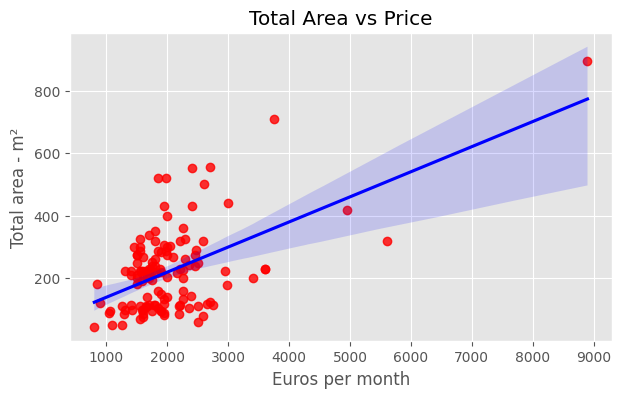

In [5]:
# Total area (volume) of property in m2 as potential predictor of price.
sns.regplot(x='Price', y='Volume', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Total Area vs Price')
plt.xlabel('Euros per month')
plt.ylabel('Total area - m²')

In [ ]:
# As volume of property goes up the price goes up too, it indicates a positive linear relationship, the volume is a predictor of price.

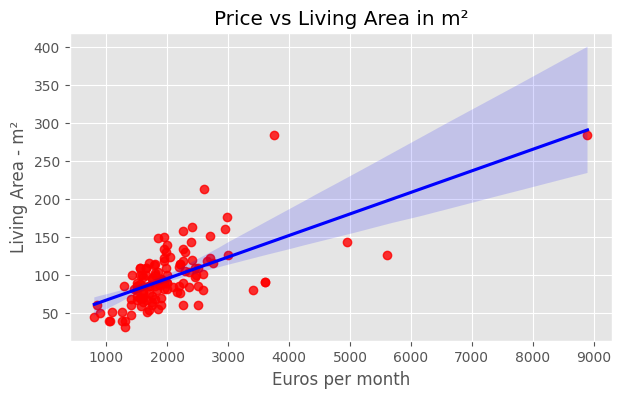

In [6]:
# Living area in m² as potential predictor of the price.
sns.regplot(x='Price', y='Living_area', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})
plt.title('Price vs Living Area in m²')
plt.xlabel('Euros per month')
plt.ylabel('Living Area - m²')
plt.show()

In [ ]:
# The bigger the Living area of property the higher the rent, living area is a good predictor of price.

<AxesSubplot: xlabel='City', ylabel='Price'>

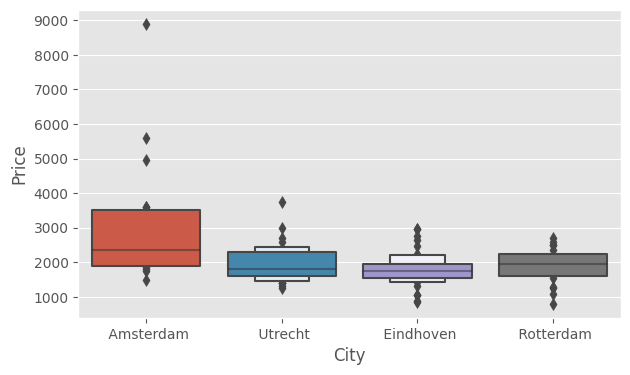

In [7]:
# City as a potential predictor of price. 
sns.boxenplot(x='City', y='Price', data=df)

In [8]:
# The distribution of price between cities shows city can be a potential predictor of price. 

In [9]:
# Assigning numeric representation to categorical variables of data type “object” in order to calculate their correlation. 
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

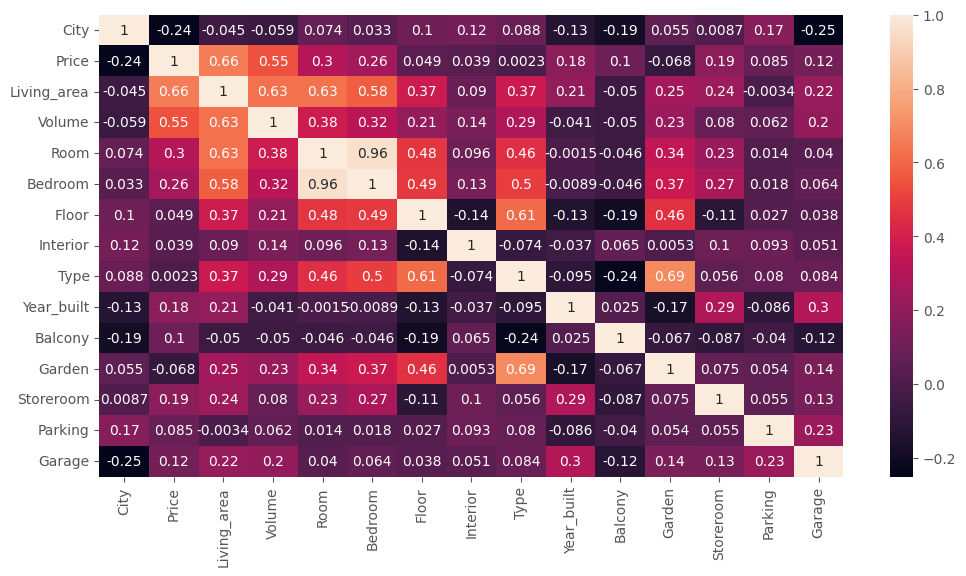

In [10]:
# Visualization of correlation. 
matplotlib.rcParams['figure.figsize'] = [12,6]
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('')
plt.show()

In [11]:
# Unpack the correlation to individual columns for better readability. 
pd.set_option('display.max_rows', None)
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

City         City           1.000000
             Price         -0.240102
             Living_area   -0.044950
             Volume        -0.058591
             Room           0.074312
             Bedroom        0.033325
             Floor          0.099598
             Interior       0.123733
             Type           0.088418
             Year_built    -0.128343
             Balcony       -0.188557
             Garden         0.055301
             Storeroom      0.008721
             Parking        0.171313
             Garage        -0.251140
Price        City          -0.240102
             Price          1.000000
             Living_area    0.662310
             Volume         0.548383
             Room           0.301734
             Bedroom        0.256084
             Floor          0.049415
             Interior       0.038812
             Type           0.002267
             Year_built     0.179416
             Balcony        0.103716
             Garden        -0.067576
 

In [12]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Garage       City          -0.251140
City         Garage        -0.251140
Price        City          -0.240102
City         Price         -0.240102
Type         Balcony       -0.236387
Balcony      Type          -0.236387
             Floor         -0.193797
Floor        Balcony       -0.193797
Balcony      City          -0.188557
City         Balcony       -0.188557
Garden       Year_built    -0.169381
Year_built   Garden        -0.169381
Floor        Interior      -0.144507
Interior     Floor         -0.144507
Year_built   Floor         -0.134346
Floor        Year_built    -0.134346
City         Year_built    -0.128343
Year_built   City          -0.128343
Garage       Balcony       -0.119057
Balcony      Garage        -0.119057
Storeroom    Floor         -0.107229
Floor        Storeroom     -0.107229
Year_built   Type          -0.095156
Type         Year_built    -0.095156
Storeroom    Balcony       -0.087307
Balcony      Storeroom     -0.087307
Year_built   Parking       -0.085700
P

In [13]:
# Shows only correlations greater than 0.5.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

Volume       Price          0.548383
Price        Volume         0.548383
Bedroom      Living_area    0.575775
Living_area  Bedroom        0.575775
Type         Floor          0.612763
Floor        Type           0.612763
Living_area  Volume         0.625105
Volume       Living_area    0.625105
Living_area  Room           0.626889
Room         Living_area    0.626889
Price        Living_area    0.662310
Living_area  Price          0.662310
Garden       Type           0.693449
Type         Garden         0.693449
Bedroom      Room           0.962569
Room         Bedroom        0.962569
City         City           1.000000
Interior     Interior       1.000000
Storeroom    Storeroom      1.000000
Garden       Garden         1.000000
Balcony      Balcony        1.000000
Year_built   Year_built     1.000000
Type         Type           1.000000
Floor        Floor          1.000000
Bedroom      Bedroom        1.000000
Room         Room           1.000000
Volume       Volume         1.000000
L

In [14]:
# Overall, the price is significantly correlated with the Living area and Volume. 

In [19]:
# How many rental properties do we have in each city?
property_count = df['City'].value_counts().to_frame()
property_count.rename(columns={"City": "Total"}, inplace=True)
property_count.index.name = "City"
property_count

,Total
City,
Eindhoven,43
Utrecht,38
Rotterdam,25
Amsterdam,19


In [20]:
# What is the average monthly rent in each city for properties with and without parking? 
df_group1 = df[['City','Parking','Price']]
AvgRent = df_group1.groupby(['City','Parking'], as_index=False).mean().round()
AvgRent

,City,Parking,Price
0,Amsterdam,Yes,3002.0
1,Eindhoven,No,1766.0
2,Eindhoven,Yes,1800.0
3,Rotterdam,Yes,1896.0
4,Utrecht,Yes,1946.0


In [21]:
# What is the average rent and Volume of properties in different cities for each type of house? 
df_group2 = df[['City', 'Type', 'Living_area', 'Price']]
AvgLivingArea = df_group2.groupby(['City', 'Type'], as_index=False).mean().round()
AvgLivingArea

,City,Type,Living_area,Price
0,Amsterdam,Apartment,98.0,3196.0
1,Amsterdam,House,110.0,1965.0
2,Eindhoven,Apartment,88.0,1728.0
3,Eindhoven,House,128.0,1980.0
4,Rotterdam,Apartment,92.0,1905.0
5,Rotterdam,House,112.0,1832.0
6,Utrecht,Apartment,82.0,1837.0
7,Utrecht,House,125.0,2184.0
